Nama : Arya Ajisadda Haryanto

NIM  : 24060122140118

Lab  : C1

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

Membuat Validasi Dataset

In [4]:
# split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

K-Folds Cross Validation

In [5]:
seed = 7
scoring = 'accuracy'

Membangun Model

In [38]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.983333 (0.033333)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


Memilih Model Terbaik

## **Model SVM**

In [39]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



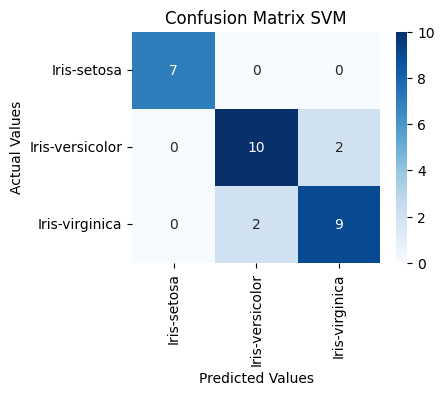

In [40]:
cm = confusion_matrix(Y_validation, predictions)
# Create a Pandas DataFrame from the confusion matrix
classes = np.unique(Y_train)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix SVM")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

## **Tugas Modul 2**

Buatlah evaluasi algoritma dengan dataset yang telah dicoba pada tugas praktikum sebelumnya (dengan menggunakan 3 model yaitu KNN, NB dan, SVM)!

## **Model K-Nearest Neighbors (KNN)**

In [55]:
knn = KNeighborsClassifier(n_neighbors=5) # Membuat model KNN dengan jumlah tetangga terdekat (n_neighbors)
knn.fit(X_train, Y_train)
predictions_knn = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions_knn))
print(confusion_matrix(Y_validation, predictions_knn))
print(classification_report(Y_validation, predictions_knn))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Menghasilkan laporan klasifikasi yang mencakup metrik utama:
1. Precision: Kemampuan model untuk tidak salah memprediksi kelas tertentu.
2. Recall: Kemampuan model mendeteksi semua data aktual dari suatu kelas.
3. F1-Score: Rata-rata harmonis antara precision dan recall.
4. Support: Jumlah sampel data aktual di setiap kelas.

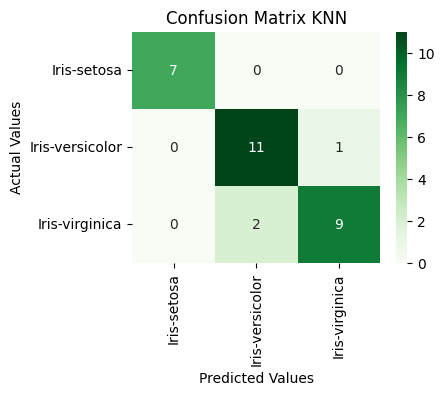

In [57]:
cm = confusion_matrix(Y_validation, predictions_knn)
# Create a Pandas DataFrame from the confusion matrix
classes = np.unique(Y_train)
cm_knn = pd.DataFrame(cm, index=classes, columns=classes)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix KNN")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

**Penjelasan KNN**

Akurasi Total: 90% (0.90)

Model KNN berhasil memprediksi dengan benar 27 dari 30 data validasi. Data Ini menunjukkan bahwa model memiliki performa yang sangat baik dalam mengklasifikasikan data uji.

<br>

---

<br>

Kesalahan Prediksi:

**Iris-versicolor:**
1 sampel salah diprediksi sebagai Iris-virginica.

**Iris-virginica:**
2 sampel salah diprediksi sebagai Iris-versicolor.
Total kesalahan prediksi = 3 sampel.

<br>

---


Penjelasan Metrix
1.	**Precision:**
* Iris-setosa: 1.00 (semua prediksi kelas ini benar).
* Iris-versicolor: 0.85 (15% prediksi kelas ini salah).
* Iris-virginica: 0.90 (10% prediksi kelas ini salah).

<br>

2.	**Recall:**
* Iris-setosa: 1.00 (semua data aktual terdeteksi).
* Iris-versicolor: 0.92 (8% data aktual salah diklasifikasikan).
* Iris-virginica: 0.82 (18% data aktual salah diklasifikasikan).

<br>

3.	**F1-Score:**
* Iris-setosa: 1.00.
* Iris-versicolor: 0.88.
* Iris-virginica: 0.86.

<br>

4.	**Rata-rata:**
* Macro Average: 0.91 (rata-rata sederhana semua metrik).
* Weighted Average: 0.90 (rata-rata metrik yang memperhitungkan jumlah sampel di setiap kelas).

## **Model Naive Bayes**

In [56]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions_nb = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions_nb))
print(confusion_matrix(Y_validation, predictions_nb))
print(classification_report(Y_validation, predictions_nb))

0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



Menghasilkan laporan klasifikasi yang mencakup metrik utama:
1. Precision: Kemampuan model untuk tidak salah memprediksi kelas tertentu.
2. Recall: Kemampuan model mendeteksi semua data aktual dari suatu kelas.
3. F1-Score: Rata-rata harmonis antara precision dan recall.
4. Support: Jumlah sampel data aktual di setiap kelas.

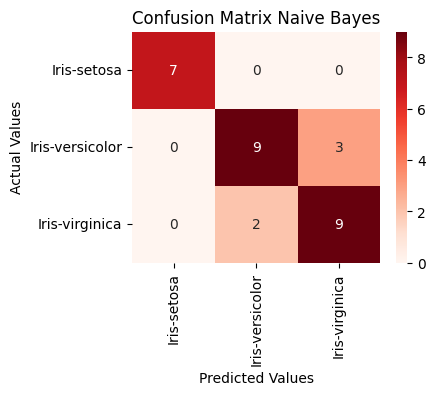

In [58]:
cm = confusion_matrix(Y_validation, predictions_nb)
# Create a Pandas DataFrame from the confusion matrix
classes = np.unique(Y_train)
cm_nb = pd.DataFrame(cm, index=classes, columns=classes)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix Naive Bayes")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

**Penjelasan Naive Bayes**

Akurasi Total: 83.33% (0.83)

Model Naive Bayes berhasil memprediksi dengan benar 25 dari 30 data validasi. Data ini menunjukkan performa model cukup baik namun lebih rendah dibandingkan KNN.

<br>

---

<br>

Kesalahan Prediksi:

**Iris-versicolor:**
3 sampel salah diprediksi sebagai Iris-virginica.

**Iris-virginica:**
2 sampel salah diprediksi sebagai Iris-versicolor.
Total kesalahan prediksi = 5 sampel.

<br>

---

<br>

Penjelasan Metrix
1.	**Precision:**
* Iris-setosa: 1.00 (semua prediksi kelas ini benar).
* Iris-versicolor: 0.82 (18% prediksi kelas ini salah).
* Iris-virginica: 0.75 (25% prediksi kelas ini salah).

<br>

2.	**Recall:**
* Iris-setosa: 1.00 (semua data aktual terdeteksi).
* Iris-versicolor: 0.75 (25% data aktual salah diklasifikasikan).
* Iris-virginica: 0.82 (18% data aktual salah diklasifikasikan).

<br>

3.	**F1-Score:**
* Iris-setosa: 1.00.
* Iris-versicolor: 0.78.
* Iris-virginica: 0.78.

<br>

4.	**Rata-rata:**
* Macro Average: 0.86 (rata-rata sederhana semua metrik).
* Weighted Average: 0.83 (rata-rata metrik yang memperhitungkan jumlah sampel di setiap kelas).